In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *

In [3]:
domain = Domain2D(7.0, 70)
numVoxels = domain.res_x*domain.res_y

# load solution from starmap solver for validation
#mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_diffusion.mat")["x"]
mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_firstorder.mat")
#mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_simplepn.mat")
x = mat_data["x"]
numCoeffs = mat_data["numCoeffs"]

u0 = np.zeros( (domain.res_x, domain.res_y) )

def get_global_index( voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff

for voxel_i in range(domain.res_y):
    for voxel_j in range(domain.res_x):
        i = get_global_index(voxel_i, voxel_j, 0)
        value = x[i]
        #if abs(value) < 0.0:
        #    value = 0.00001
        u0[voxel_i, voxel_j] = value
        
u0 = np.abs(u0)
        
        
vmin = 1.0e-8
vmax = np.max(u0)*1.0

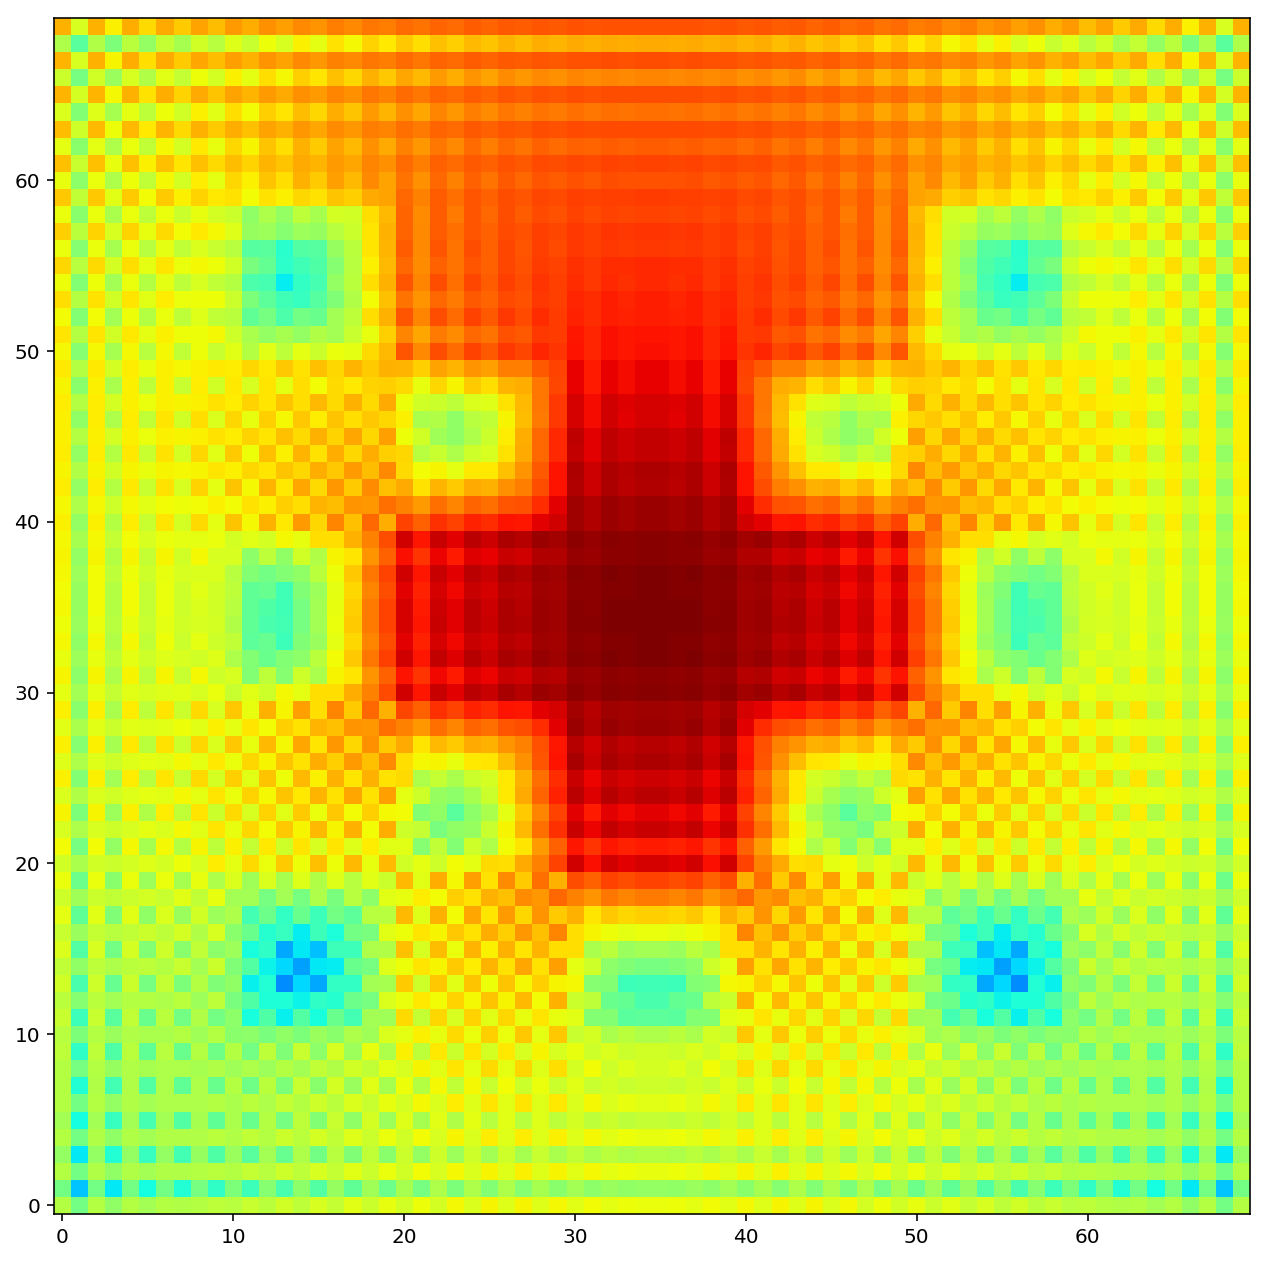

In [4]:
fig = plt.figure(figsize=(11, 11))
plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
#plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
plt.show()

In [11]:
divmod(-1, 2)

(-1, 1)

$$
-\frac{1}{2}c^{{l'-1,m'-1}}\partial_xL^{{l'-1,m'-1}}\left (\vec{x} \right )
$$

$$
\frac{1}{2}d^{{l'+1,m'-1}}\partial_xL^{{l'+1,m'-1}}\left (\vec{x} \right )
$$

In [13]:
import shtools

shtools.d_lm(1, -1)

0.81649658092772603